# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Cano Amaro

Student name: Germán
    
ID:46074312E

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm 

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 46074312
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [61 51 66 60 61 58 60 55 62 66]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return


INPUT:


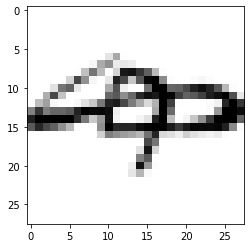

LABEL: 7
INPUT:


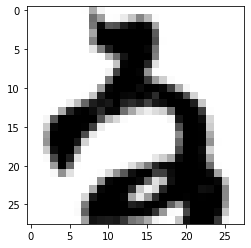

LABEL: 4
INPUT:


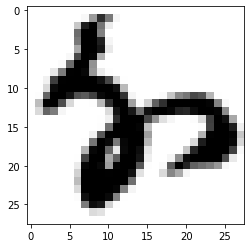

LABEL: 4
INPUT:


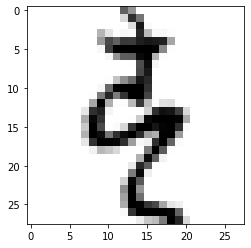

LABEL: 2


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

#train linear SVM

lin=GridSearchCV(estimator=SVC(kernel='linear'), param_grid=parameters, return_train_score=True)

lin.fit(X_train,y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:",lin.best_params_)


print("Score with best parameters:", lin.best_score_)


print('\n',"All scores on the grid: \n", pd.DataFrame(lin.cv_results_))

RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 0.01}
Score with best parameters: 0.7516666666666666

 All scores on the grid: 
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.281249      0.024988         0.087164        0.008292    0.01   
1       0.277444      0.016139         0.062032        0.008283     0.1   
2       0.247152      0.006160         0.053250        0.003247       1   
3       0.250514      0.004146         0.057656        0.004342      10   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.808333           0.733333           0.700000   
1   {'C': 0.1}           0.716667           0.733333           0.683333   
2     {'C': 1}           0.716667           0.733333           0.683333   
3    {'C': 10}           0.716667           0.733333           0.683333   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.766667  ...    

## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel

poly=GridSearchCV(estimator=SVC(kernel='poly',degree=2), param_grid=parameters, return_train_score=True)

poly.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:", poly.best_params_)


print("Score with best parameters:", poly.best_score_)


print("\n","All scores on the grid: \n", pd.DataFrame(poly.cv_results_))

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: {'C': 0.01, 'gamma': 0.1}
Score with best parameters: 0.7633333333333333

 All scores on the grid: 
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.364453      0.015635         0.069852        0.002175    0.01   
1       0.281635      0.007310         0.056845        0.002585    0.01   
2       0.304767      0.008949         0.059240        0.006137    0.01   
3       0.336905      0.019206         0.069610        0.003555     0.1   
4       0.313532      0.015761         0.056650        0.008591     0.1   
5       0.311340      0.024852         0.054878        0.006282     0.1   
6       0.282463      0.010680         0.058456        0.002150       1   
7       0.326937      0.028615         0.058450        0.003996       1   
8       0.304376      0.006223         0.056253        0.005084       1   

  param_gamma                      params  split0_test_score  \
0        0.01  {'C': 0.0

## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3#by default the degree un SCV() is 3
poly2=GridSearchCV(estimator=SVC(kernel='poly'), param_grid=parameters, return_train_score=True)

poly2.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:", poly2.best_params_)


print("Score with best parameters:", poly2.best_score_)


print("\n","All scores on the grid: \n", pd.DataFrame(poly2.cv_results_))

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found: {'C': 0.01, 'gamma': 0.1}
Score with best parameters: 0.7033333333333334

 All scores on the grid: 
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.363410      0.014275         0.071429        0.005267    0.01   
1       0.329726      0.006925         0.055051        0.002486    0.01   
2       0.330718      0.009040         0.055936        0.003603    0.01   
3       0.332918      0.002911         0.070212        0.002636     0.1   
4       0.326340      0.003592         0.052265        0.002541     0.1   
5       0.326515      0.004132         0.055472        0.005934     0.1   
6       0.338485      0.019687         0.065034        0.007542       1   
7       0.350844      0.030365         0.058846        0.005852       1   
8       0.328313      0.011336         0.062631        0.015052       1   

  param_gamma                      params  split0_test_score  \
0        0.01  {'C': 0

## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel

rbf=GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=parameters, return_train_score=True)

rbf.fit(X_train,y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:", rbf.best_params_)


print("Score with best parameters:", rbf.best_score_)

print("\n","All scores on the grid: \n", pd.DataFrame(rbf.cv_results_))

RESULTS FOR rbf KERNEL
Best parameters set found: {'C': 10, 'gamma': 0.01}
Score with best parameters: 0.7833333333333333

 All scores on the grid: 
     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.394356      0.018258         0.148000        0.010865     0.1   
1        0.396936      0.028249         0.144604        0.014949     0.1   
2        0.459574      0.038146         0.165557        0.017391     0.1   
3        0.413108      0.032818         0.143811        0.011088     0.1   
4        0.343495      0.008931         0.139408        0.004704       1   
5        0.382175      0.012107         0.134836        0.001324       1   
6        0.407682      0.003465         0.139422        0.003117       1   
7        0.398945      0.001651         0.138825        0.002467       1   
8        0.248924      0.005566         0.122674        0.001099      10   
9        0.393922      0.003980         0.134240        0.002329      10   
10       0.407

## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

We can observe how using RBF we obtain the best score. The polynomial kernel increase its precision until degree 2, after that the score drop.

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = rbf

training_error=1-best_SVM.score(X_train, y_train)

test_error = 1-best_SVM.score(X_test, y_test)

# (error is 1 - svm.score)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)


Best SVM training error: 0.000000
Best SVM test error: 0.184000


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


[0.15625    0.15708333 0.68791667 0.97291667 1.         1.
 1.         1.        ]
[0.145      0.145      0.62333333 0.77333333 0.15666667 0.11
 0.15333333 0.10833333]


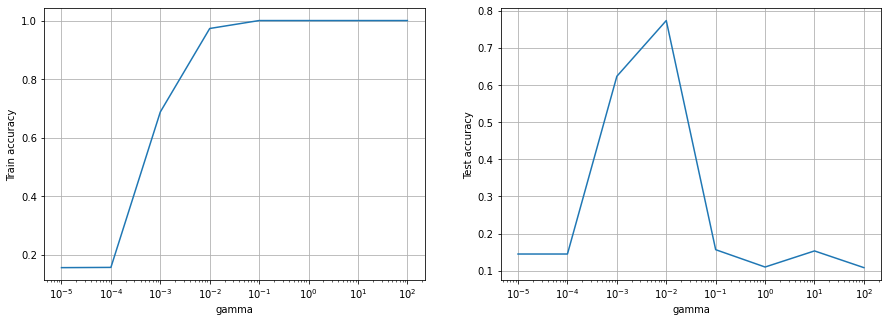

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []


parameters2={'C':[1],'gamma':gamma_values}

rbf2=GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=parameters2,return_train_score=True)

rbf2.fit(X_train, y_train)

train_acc_list=rbf2.cv_results_['mean_train_score']
    
test_acc_list=rbf2.cv_results_['mean_test_score']
    

print(train_acc_list)
print(test_acc_list)
    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [199 200 169 207 214 217 190 188 218 198]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV
best_SVM = rbf

training_error=1-best_SVM.score(X_train, y_train)

test_error = 1-best_SVM.score(X_test, y_test)

# (error is 1 - svm.score)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.179500
Best SVM test error: 0.183569


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [17]:
from sklearn import linear_model

logreg=linear_model.LogisticRegression(C=1e5)

logreg.fit(X_train, y_train)

training_error = 1-logreg.score(X_train, y_train)
test_error = 1-logreg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

C:\Users\germa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.265759


## TO DO 9 Try  with regularization (use C=1)¶

In [18]:
logreg2=linear_model.LogisticRegression(C=1)

logreg2.fit(X_train, y_train)

training_error = 1-logreg2.score(X_train, y_train)
test_error = 1-logreg2.score(X_test, y_test)
print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)


C:\Users\germa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best regularized logistic regression training error: 0.000000
Best regularized logistic regression test error: 0.244086


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

For m=2000:

Best SVM training error: 0.179500
Best SVM test error: 0.183569

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.265759

Best regularized logistic regression training error: 0.000000
Best regularized logistic regression test error: 0.244086

We can observe how for the SVM algorithm the error of the training and test set are almost equal, which point to a good fitting.
The Logistic Regression algorithm has errors who differs notably from the training and test set independently on the value of the parameter (C) in charge of the stabilization. This could possibly mean that the algorithm is overfitting.
Taking that into account we can see how even though the training error of the Linear Regression algorithm is almost nule, the SVM makes a better aproximation

For m=600:

Best SVM training error: 0.185000
Best SVM test error: 0.183418

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.274764

Best regularized logistic regression training error: 0.000000
Best regularized logistic regression test error: 0.271397

Again the SVM algorithm shows the best results, even better at first sight than for m=2000, the linear regression algorithm shows worse results for both C large and small.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


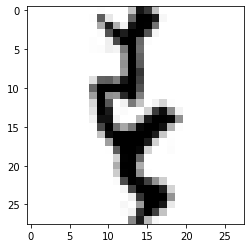

LABEL: 2


In [19]:
LR_prediction = logreg2.predict(X_train)
SVM_prediction = best_SVM.predict(X_train)

sem=True
i=0#i is going to be the index of the first misclassified sample
while sem:
    if LR_prediction[i]==SVM_prediction[i]:
        i+=1
    else:
        sem=False
        i+=1
    
plot_input(X_train,y_train,i)

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [20]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_train,SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  skm.confusion_matrix(y_train,LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5801 5800 5831 5793 5786 5783 5810 5812 5782 5802]

 Confusion matrix SVM  
 
 [[181   0   0   4   3   5   0   2   1   3]
 [  3 135  14   3   5   8   8   1  13  10]
 [  0   7 128   2   4   2  15   0   9   2]
 [  1   2   4 189   0   6   0   0   5   0]
 [ 11   3  10   1 157   1   4   1   5  21]
 [  2   1   9   6   2 191   3   1   2   0]
 [  3   5  10   6  15   2 144   4   1   0]
 [  1   0   7   4   8   2   2 163   0   1]
 [  4   5   8   1   0   7   9   0 183   1]
 [  5   3   9   2   4   0   0   0   5 170]]

 Confusion matrix SVM (normalized)   
 
 [[0.03 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.03 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.03 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.03 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.02 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.

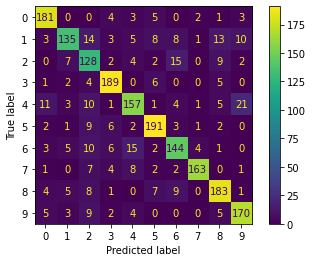

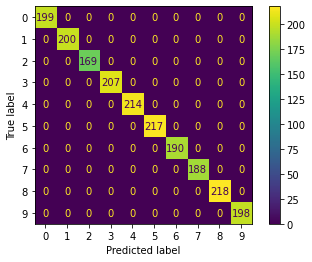

In [21]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX
#code to print the confusion matrix

SVM_gr= skm.ConfusionMatrixDisplay(confusion_matrix=confusion_SVM)

LR_gr= skm.ConfusionMatrixDisplay(confusion_matrix=confusion_LR)

SVM_gr.plot()
LR_gr.plot()

plt.show()


## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


The results obtained, agree with the ones for the previous question. Befor we obtained a zero error on the train set for the linear regression algorithm, this is shown on the confusion matrix where we can see how it is diagonal, corresponding each value to the total count for each label (also previously obtained).

For the SVM algorithm the error was not zero, that joint to the fact that each label appears a different numbers of times, give us an explanation of why some classes accuracies differs.